Условия лабораторной:
Вариант 7:
Параметры (a, σ^2) - (0,9); n - 60; q - 1.75; k - 3; Правило для подсчёта числа интервалов группировки - Стерджеса; Закон распределния случайной величины Y - Треугольное на отрезке (-2, 4) и модой, равной 1.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew, kurtosis

In [1]:
sample = np.random.normal(0, 9, 60)

print(sample)

In [19]:
# Создаем DataFrame из выборки
df = pd.DataFrame(sample, columns=['X'])

# Находим минимальное и максимальное значение выборки
min_value = df['X'].min()
max_value = df['X'].max()

# Выбираем количество интервалов по правилу Стерджесса
k = 1 + 3.322 * np.log10(len(sample))

# Вычисляем длину интервала
h = (max_value - min_value) / k

# Создаем интервальный ряд с помощью метода cut
df['interval'] = pd.cut(df['X'], bins=np.arange(min_value, max_value+h, h))

# Находим абсолютные частоты с помощью метода value_counts
absolute_freq = df['interval'].value_counts()

# Вычисляем сумму абсолютных частот
sum_absolute_freq = absolute_freq.sum() + 1

print("Интервальный ряд абсолютных частот:")
print(absolute_freq)
print("Сумма абсолютных частот:", sum_absolute_freq)

Интервальный ряд абсолютных частот:
(-1.059, 5.984]       21
(-8.102, -1.059]      14
(5.984, 13.028]       10
(-15.145, -8.102]      7
(13.028, 20.071]       5
(-22.188, -15.145]     2
(-29.231, -22.188]     0
Name: interval, dtype: int64
Сумма абсолютных частот: 60


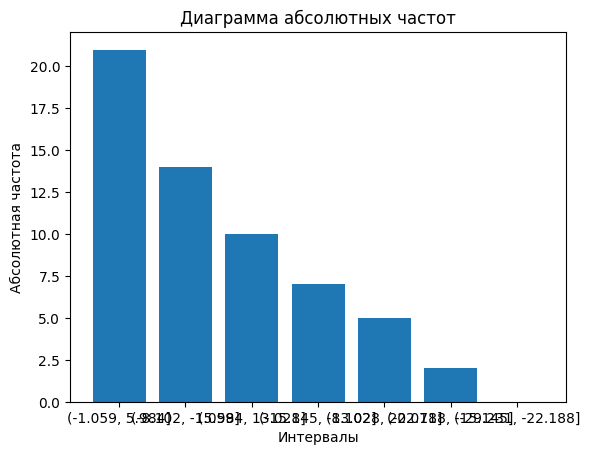

In [12]:
# Строим диаграмму абсолютных частот
plt.bar(absolute_freq.index.astype(str), absolute_freq)
plt.xlabel('Интервалы')
plt.ylabel('Абсолютная частота')
plt.title('Диаграмма абсолютных частот')
plt.show()

In [18]:
# Находим относительные частоты
relative_freq = absolute_freq / sum(absolute_freq)

# Вычисляем сумму относительных частот
sum_relative_freq = relative_freq.sum()

print("Интервальный ряд относительных частот:")
print(relative_freq)
print("Сумма относительных частот:", sum_relative_freq)

Интервальный ряд относительных частот:
(-1.059, 5.984]       0.355932
(-8.102, -1.059]      0.237288
(5.984, 13.028]       0.169492
(-15.145, -8.102]     0.118644
(13.028, 20.071]      0.084746
(-22.188, -15.145]    0.033898
(-29.231, -22.188]    0.000000
Name: interval, dtype: float64
Сумма относительных частот: 1.0


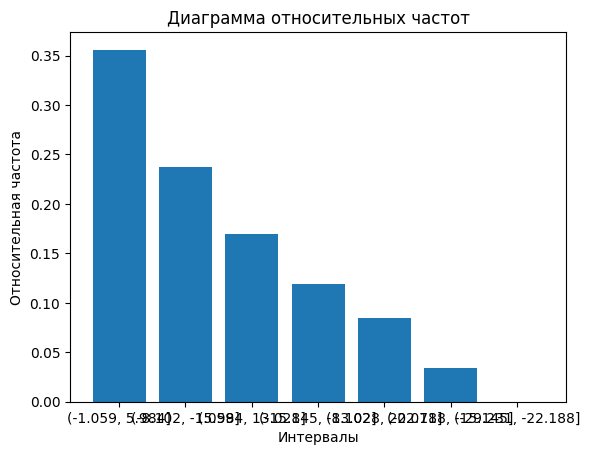

In [15]:
plt.bar(relative_freq.index.astype(str), relative_freq)
plt.xlabel('Интервалы')
plt.ylabel('Относительная частота')
plt.title('Диаграмма относительных частот')
plt.show()

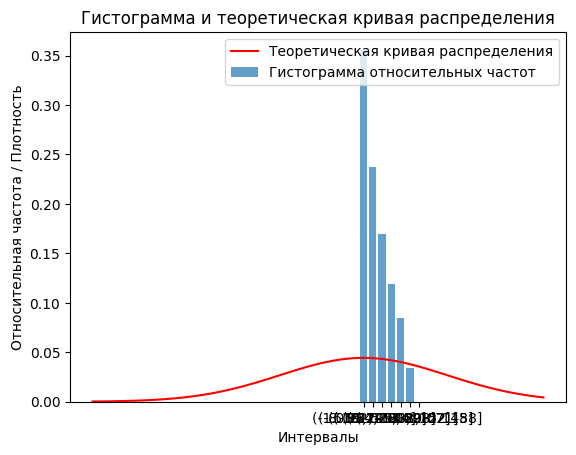

In [21]:
# Строим гистограмму относительных частот
plt.bar(relative_freq.index.astype(str), relative_freq, alpha=0.7, label='Гистограмма относительных частот')

# Строим теоретическую кривую распределения
x = np.linspace(min_value, max_value, 100)
pdf = stats.norm.pdf(x, 0, 9)  # плотность нормального распределения (0, 9)
plt.plot(x, pdf, 'r', label='Теоретическая кривая распределения')

plt.xlabel('Интервалы')
plt.ylabel('Относительная частота / Плотность')
plt.title('Гистограмма и теоретическая кривая распределения')
plt.legend()
plt.show()

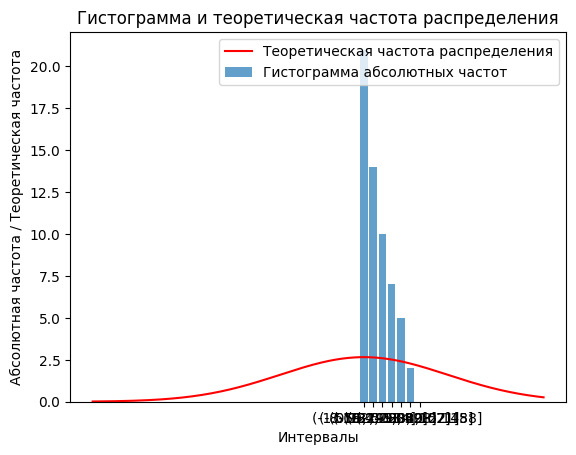

In [22]:
# Строим гистограмму абсолютных частот
plt.bar(absolute_freq.index.astype(str), absolute_freq, alpha=0.7, label='Гистограмма абсолютных частот')

# Строим график теоретической частоты распределения
x = np.arange(min_value, max_value, 0.1)
y = len(sample) * stats.norm.pdf(x, 0, 9)  # теоретическая частота распределения
plt.plot(x, y, 'r', label='Теоретическая частота распределения')

plt.xlabel('Интервалы')
plt.ylabel('Абсолютная частота / Теоретическая частота')
plt.title('Гистограмма и теоретическая частота распределения')
plt.legend()
plt.show()

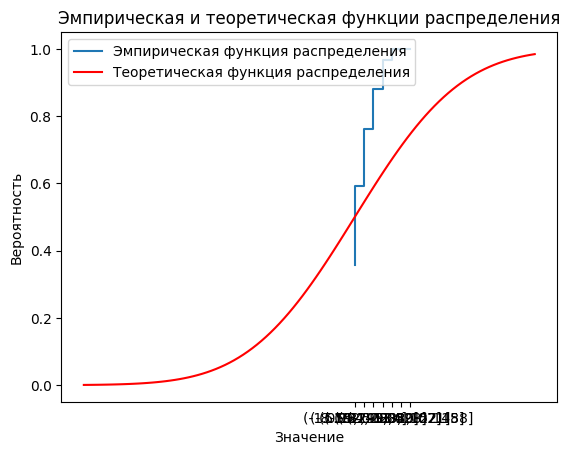

In [23]:
# Рассчитываем кумулятивные относительные частоты
cumulative_relative_freq = relative_freq.cumsum()

# Строим график эмпирической функции распределения
plt.step(cumulative_relative_freq.index.astype(str), cumulative_relative_freq, label='Эмпирическая функция распределения')

# Строим график теоретической функции распределения
x = np.linspace(min_value, max_value, 100)
cdf = stats.norm.cdf(x, 0, 9)  # теоретическая функция распределения
plt.plot(x, cdf, 'r', label='Теоретическая функция распределения')

plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.title('Эмпирическая и теоретическая функции распределения')
plt.legend()
plt.show()

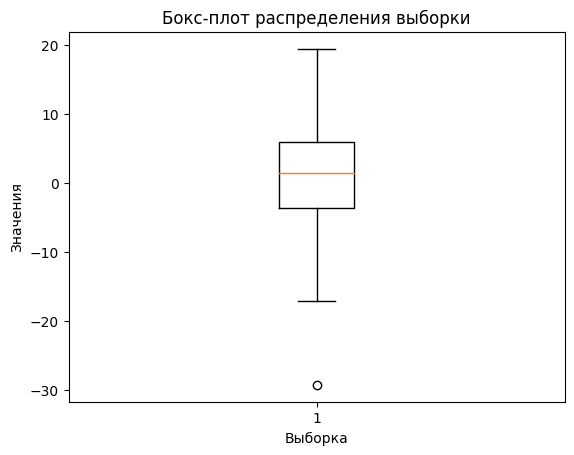

In [24]:
# Строим бокс-плот
plt.boxplot(sample)
plt.xlabel('Выборка')
plt.ylabel('Значения')
plt.title('Бокс-плот распределения выборки')
plt.show()

In [28]:
# Заданные параметры
q = 1.75  # коэффициент
mean = 0  # математическое ожидание
std_dev = 9  # стандартное отклонение

# Вычисляем вероятность P(|X-MX|<qσ)
probability = stats.norm.cdf(q, loc=mean, scale=std_dev) - stats.norm.cdf(-q, loc=mean, scale=std_dev)

print("Вероятность P(|X-MX|<qσ):", probability)

Вероятность P(|X-MX|<qσ): 0.1541721076871374


In [32]:
# Вычисляем относительную частоту события {|X-MX|<qσ}
count = len([x for x in sample if abs(x - mean) < q * std_dev])  # количество значений, удовлетворяющих условию
relative_frequency = count / len(sample)

print("Относительная частота события {|X-MX|<qσ}:", relative_frequency)

Относительная частота события {|X-MX|<qσ}: 0.9333333333333333


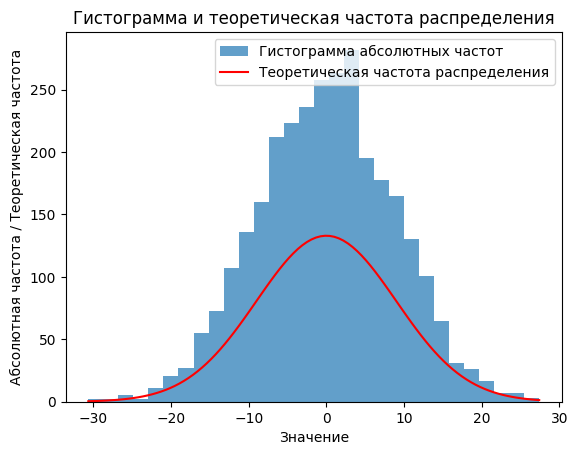

In [34]:
# Генерируем новую выборку увеличенного объема
new_sample = np.random.normal(0, 9, 3000)  # объем увеличен в 50 раз

# Строим гистограмму абсолютных частот
plt.hist(new_sample, bins=30, alpha=0.7, label='Гистограмма абсолютных частот')

# Строим график теоретической частоты распределения
x = np.linspace(min(new_sample), max(new_sample), 100)
y = len(new_sample) * stats.norm.pdf(x, 0, 9)  # теоретическая частота распределения
plt.plot(x, y, 'r', label='Теоретическая частота распределения')

plt.xlabel('Значение')
plt.ylabel('Абсолютная частота / Теоретическая частота')
plt.title('Гистограмма и теоретическая частота распределения')
plt.legend()
plt.show()

In [37]:
# Выборка
sample = np.random.normal(0, 9, 60)

# Математическое ожидание
mean = np.mean(sample)

# Медиана
median = np.median(sample)

# Дисперсия
variance = np.var(sample)

# Стандартное отклонение
std_dev = np.std(sample)

# Коэффициент ассиметрии
skewness = skew(sample)

# Эксцесс
kurt = kurtosis(sample)

print("Математическое ожидание:", mean)
print("Медиана:", median)
print("Дисперсия:", variance)
print("Стандартное отклонение:", std_dev)
print("Коэффициент ассиметрии:", skewness)
print("Эксцесс:", kurt)

Математическое ожидание: -1.4173048003640571
Медиана: -1.861582652119682
Дисперсия: 65.53239818003921
Стандартное отклонение: 8.095208346919751
Коэффициент ассиметрии: -0.09543764158520814
Эксцесс: -0.7121272201225226


In [38]:
# Выборка
sample = np.random.normal(0, 9, 3000)

# Математическое ожидание
mean = np.mean(sample)

# Медиана
median = np.median(sample)

# Дисперсия
variance = np.var(sample)

# Стандартное отклонение
std_dev = np.std(sample)

# Коэффициент ассиметрии
skewness = skew(sample)

# Эксцесс
kurt = kurtosis(sample)

print("Математическое ожидание:", mean)
print("Медиана:", median)
print("Дисперсия:", variance)
print("Стандартное отклонение:", std_dev)
print("Коэффициент ассиметрии:", skewness)
print("Эксцесс:", kurt)

Математическое ожидание: -0.25400287571867375
Медиана: -0.07672229515309748
Дисперсия: 84.07035838063987
Стандартное отклонение: 9.168988950840756
Коэффициент ассиметрии: -0.009939811281872891
Эксцесс: 0.03995581745769128
